# Statsmodels

## Setup

In [6]:
%matplotlib inline

import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from statsmodels.tools.eval_measures import mse, rmse

sns.set_theme(style="ticks", color_codes=True)

## Data preparation

In [7]:
# See notebook "Data Exploration" for details about data preprocessing
from case_duke_data_prep import *

## Data splitting

In [8]:
train_dataset = df.sample(frac=0.8, random_state=0)
test_dataset = df.drop(train_dataset.index)

## Modeling

### Train the model

In [9]:
# Fit Model
lm = smf.ols(formula='price ~ area', data=train_dataset).fit()

In [10]:
# Short summary
lm.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,8.593e+04,6.21e+04,1.383,0.171,-3.78e+04,2.1e+05
area,167.7007,20.741,8.085,0.000,126.391,209.010


In [11]:
# Full summary
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.462
Model:                            OLS   Adj. R-squared:                  0.455
Method:                 Least Squares   F-statistic:                     65.37
Date:                Wed, 05 Jan 2022   Prob (F-statistic):           7.56e-12
Time:                        22:37:38   Log-Likelihood:                -1053.3
No. Observations:                  78   AIC:                             2111.
Df Residuals:                      76   BIC:                             2115.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   8.593e+04   6.21e+04      1.383      0.171   -3.78e+04     2.1e+05
area         167.7007     20.741      8.085      0.000     126.391     209.010
==============================================================================
Omnibus:                       26.589   Durbin-Watson:                   2.159
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              107.927
Skew:                          -0.862   Prob(JB):                     3.66e-24
Kurtosis:                       8.499   Cond. No.                     9.16e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.16e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

To obtain single statistics:

In [12]:
# Adjusted R squared 
lm.rsquared_adj

0.4553434818683253

In [13]:
# R squared
lm.rsquared

0.4624169431427626

In [14]:
# AIC
lm.aic

2110.625966301898

In [15]:
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78 entries, 26 to 73
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   price       78 non-null     int64   
 1   bed         78 non-null     int64   
 2   bath        78 non-null     float64 
 3   area        78 non-null     int64   
 4   year_built  78 non-null     int64   
 5   cooling     78 non-null     category
 6   lot         78 non-null     float64 
dtypes: category(1), float64(2), int64(4)
memory usage: 4.5 KB


In [16]:
# Add the regression predictions (as "pred") to our DataFrame
train_dataset['y_pred'] = lm.predict()

In [17]:
# MSE
mse(train_dataset['price'], train_dataset['y_pred'])

31402336646.61913

In [18]:
# RMSE
rmse(train_dataset['price'], train_dataset['y_pred'])

177207.04457390832

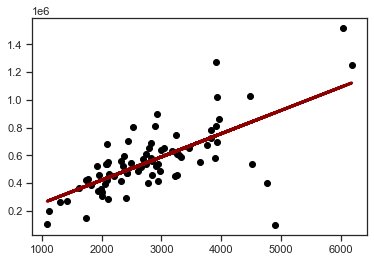

In [19]:
# Plot regression line 
plt.scatter(train_dataset['area'], train_dataset['price'],  color='black')
plt.plot(train_dataset['area'], train_dataset['y_pred'], color='darkred', linewidth=3);

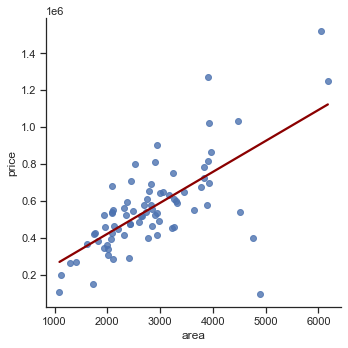

In [20]:
# Plot with Seaborn

import seaborn as sns 
sns.set_theme(style="ticks")

sns.lmplot(x='area', y='price', data=train_dataset, line_kws={'color': 'darkred'}, ci=False);

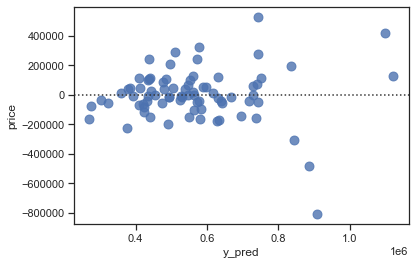

In [21]:
sns.residplot(x="y_pred", y="price", data=train_dataset, scatter_kws={"s": 80});

### Validation with test data

In [22]:
# Add regression predictions for the test set (as "pred_test") to our DataFrame
test_dataset['y_pred'] = lm.predict(test_dataset['area'])

In [23]:
test_dataset.head()

,price,bed,bath,area,year_built,cooling,lot,y_pred
9,650000,3,2.0,2173,1964,other,0.73,450348.456333
12,671500,3,3.0,2200,1964,central,0.51,454876.375736
21,645000,4,4.0,2300,1969,central,0.47,471646.447601
25,603000,4,4.0,3487,1965,central,0.61,670707.200633
36,615000,3,3.0,2203,1954,other,0.63,455379.477892


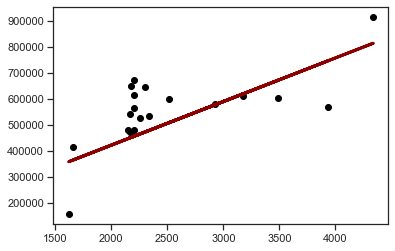

In [24]:
# Plot regression line 
plt.scatter(test_dataset['area'], test_dataset['price'],  color='black')
plt.plot(test_dataset['area'], test_dataset['y_pred'], color='darkred', linewidth=3);

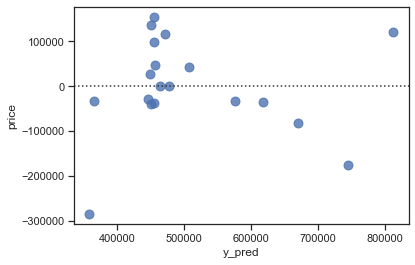

In [25]:
sns.residplot(x="y_pred", y="price", data=test_dataset, scatter_kws={"s": 80});

In [26]:
# RMSE
rmse(test_dataset['price'], test_dataset['y_pred'])

119345.88525637302

## Multiple regression

In [27]:
lm_m = smf.ols(formula='price ~ area + bed + bath + year_built + cooling + lot', data=train_dataset).fit()

In [28]:
lm_m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.626
Model:                            OLS   Adj. R-squared:                  0.595
Method:                 Least Squares   F-statistic:                     19.83
Date:                Wed, 05 Jan 2022   Prob (F-statistic):           1.86e-13
Time:                        22:37:42   Log-Likelihood:                -1039.1
No. Observations:                  78   AIC:                             2092.
Df Residuals:                      71   BIC:                             2109.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept        -2.944e+06   2.26e+06     -1.302      0.197   -7.45e+06    1.56e+06
cooling[T.other] -1.021e+05   3.67e+04     -2.778      0.007   -1.75e+05   -2.88e+04
area               111.8295     25.915      4.315      0.000      60.156     163.503
bed               5121.5208    3.1e+04      0.165      0.869   -5.68e+04     6.7e+04
bath              2.678e+04   2.94e+04      0.910      0.366   -3.19e+04    8.55e+04
year_built        1491.1176   1157.430      1.288      0.202    -816.732    3798.968
lot               3.491e+05   8.53e+04      4.094      0.000    1.79e+05    5.19e+05
==============================================================================
Omnibus:                       27.108   Durbin-Watson:                   1.919
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              112.999
Skew:                          -0.874   Prob(JB):                     2.90e-25
Kurtosis:                       8.632   Cond. No.                     4.57e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.57e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""